In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
df_tr = pd.read_csv("../data/sales_transactions.csv", parse_dates=["date"])

# Агрегируем пр дате, чтобы шума было меньше
df_tr_daily = df_tr.groupby("date", as_index=False)[["total_sales", "transactions"]].sum()
df_tr_daily.head()

,date,total_sales,transactions
0,2013-01-01,2511.62,770
1,2013-01-02,496092.50,93215
2,2013-01-03,361461.28,78504
3,2013-01-04,354459.74,78494
4,2013-01-05,477350.26,93573


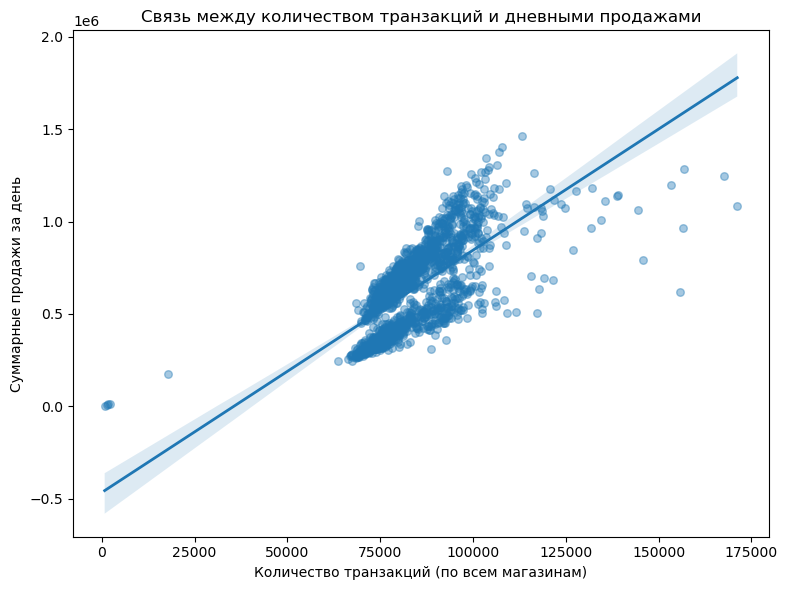

In [20]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_tr_daily,
    x="transactions",
    y="total_sales",
    scatter_kws={"alpha": 0.4, "s": 30},
    line_kws={"linewidth": 2}
)
plt.title("Связь между количеством транзакций и дневными продажами")
plt.xlabel("Количество транзакций (по всем магазинам)")
plt.ylabel("Суммарные продажи за день")
plt.tight_layout()
plt.show()

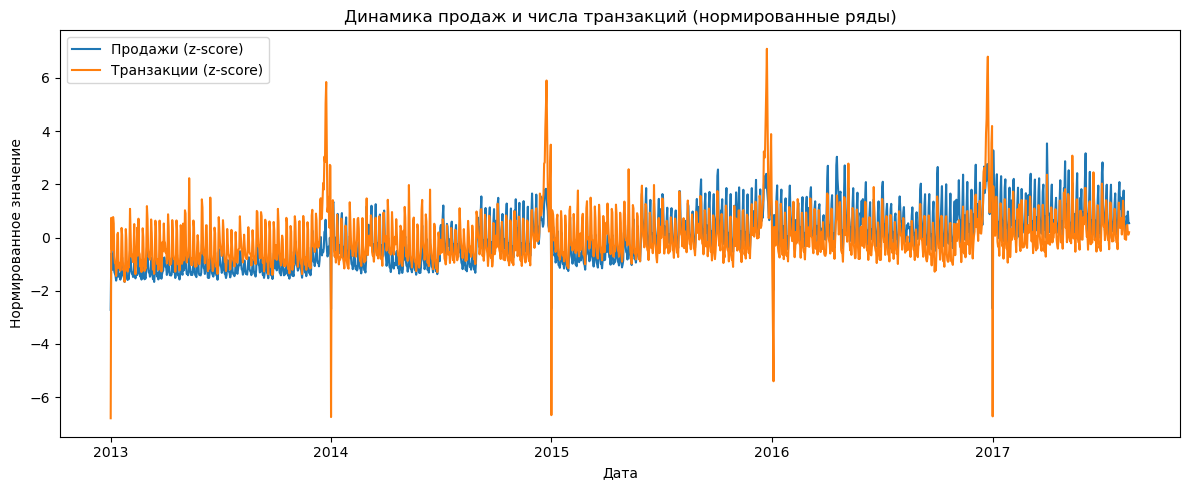

In [22]:
df_tr_daily_norm = df_tr_daily.copy()
for col in ["total_sales", "transactions"]:
    df_tr_daily_norm[col] = (df_tr_daily_norm[col] - df_tr_daily_norm[col].mean()) / df_tr_daily_norm[col].std()

plt.figure(figsize=(12, 5))
plt.plot(df_tr_daily_norm["date"], df_tr_daily_norm["total_sales"], label="Продажи (z-score)")
plt.plot(df_tr_daily_norm["date"], df_tr_daily_norm["transactions"], label="Транзакции (z-score)")
plt.title("Динамика продаж и числа транзакций (нормированные ряды)")
plt.xlabel("Дата")
plt.ylabel("Нормированное значение")
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
df_oil = pd.read_csv("../data/sales_oil.csv", parse_dates=["date"])

df_oil_daily = df_oil.groupby("date", as_index=False)[["total_sales"]].sum()
df_oil_daily = df_oil_daily.merge(
    df_oil[["date", "dcoilwtico"]].drop_duplicates(),
    on="date",
    how="left"
)

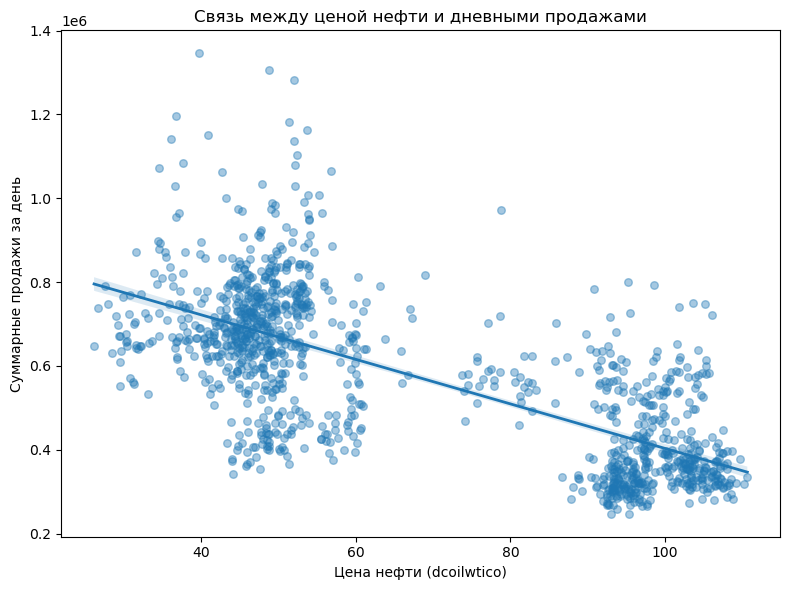

In [23]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_oil_daily.dropna(subset=["dcoilwtico"]),
    x="dcoilwtico",
    y="total_sales",
    scatter_kws={"alpha": 0.4, "s": 30},
    line_kws={"linewidth": 2}
)
plt.title("Связь между ценой нефти и дневными продажами")
plt.xlabel("Цена нефти (dcoilwtico)")
plt.ylabel("Суммарные продажи за день")
plt.tight_layout()
plt.show()

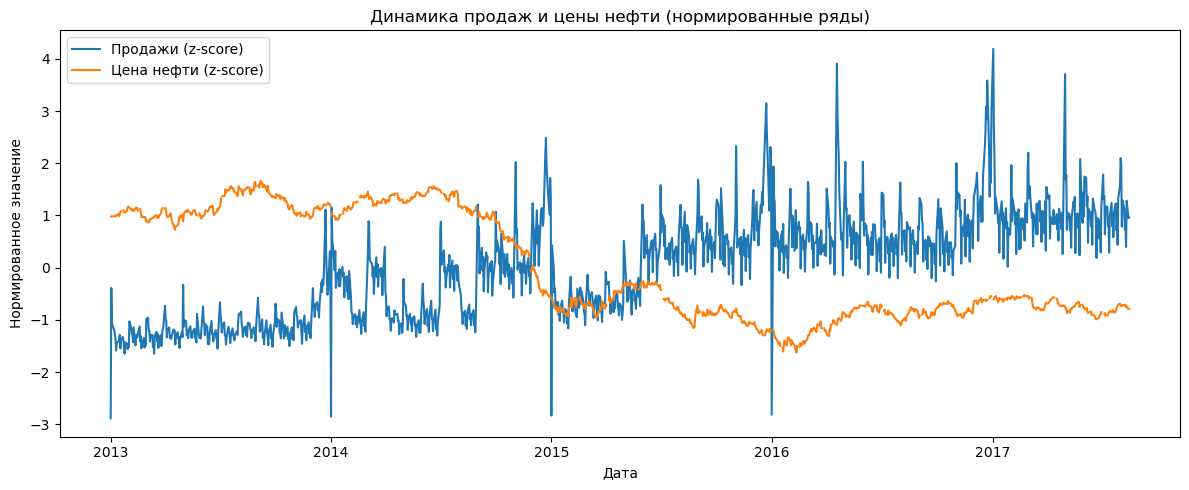

In [24]:
df_oil_daily_norm = df_oil_daily.copy()
for col in ["total_sales", "dcoilwtico"]:
    df_oil_daily_norm[col] = (df_oil_daily_norm[col] - df_oil_daily_norm[col].mean()) / df_oil_daily_norm[col].std()

plt.figure(figsize=(12, 5))
plt.plot(df_oil_daily_norm["date"], df_oil_daily_norm["total_sales"], label="Продажи (z-score)")
plt.plot(df_oil_daily_norm["date"], df_oil_daily_norm["dcoilwtico"], label="Цена нефти (z-score)")
plt.title("Динамика продаж и цены нефти (нормированные ряды)")
plt.xlabel("Дата")
plt.ylabel("Нормированное значение")
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
df_tr_daily[["total_sales", "transactions"]].corr()
df_oil_daily[["total_sales", "dcoilwtico"]].corr()

,total_sales,dcoilwtico
total_sales,1.000000,-0.705002
dcoilwtico,-0.705002,1.000000
